# PHYS 434 Lab 1
#### Haowen Guan

Initializing the environment as below:

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (15,10)

## Normal distribution
The probability density fuction of normal distribution is  $ P(x)= \frac{1}{\sigma \sqrt {2\pi}}e^{-(x-\mu)^2/(2 \sigma^2)} $.
<br>Where it is depends on $\mu$ and $\sigma$, each represent the mean and the varience of distribution.
<br>We would use a $X\sigma$ notion to represent how far is a sample from the mean, and the X value can also be used to find the area under the graph from right most tail to its current location.
<br>
<br>As follow, it is an example of using X value = 1, 2, and 4 to find the right sided area (same as z-table).

In [8]:
#1 B) testing for stats.norm.cdf()
print(stats.norm.cdf(1))
print(stats.norm.cdf(2))
print(stats.norm.cdf(4))

0.8413447460685429
0.9772498680518208
0.9999683287581669


Our goal to this problem is, however, inverse of the above prcedure.
<br> We would like to use the probability (area) to find the the correponding X (value of $\sigma$).
<br> Thus, we could use the code below to test for the probabilities we found in previous question.

In [9]:
#1 C) testing for stats.norm.ppf()
print(stats.norm.ppf(0.8413447460685429))
print(stats.norm.ppf(0.9772498680518208))
print(stats.norm.ppf(0.9999683287581669))

1.0
2.0000000000000004
4.0


Since the distribution we are using is the standard normal distribtion, with $\mu = 0$ and $\sigma = 1$.
<br>We know that if we give a probability smaller than 0.5, the value of $\sigma$ will be a negative number.
<br>Below are few examples of negative value of $\sigma$, I simply fliped the points and probability by y-axis.

In [10]:
#1 D) testing for negative values
print(stats.norm.ppf(1 - 0.8413447460685429))
print(stats.norm.ppf(1 - 0.9772498680518208))
print(stats.norm.ppf(1 - 0.9999683287581669))

-1.0
-2.0000000000000004
-4.0


## Chi-Squared distribution
Chi-Squared distribution have one parameter *k*, which represent the degrees of freedom.
This is a distribution represent a sum of squares of *k* independent standard normal random variables.
<br>That is If $X_n$ are standard normal random variables, then $\sum X_i^2$ has a Chi-squared distribution.
<br>
<br> A example of *k* = 5 is as follow:

In [11]:
#2 A) The distribution I picked is Chi-Squared
d = stats.chi2.rvs(df = 5., scale = 1, size = 100000)

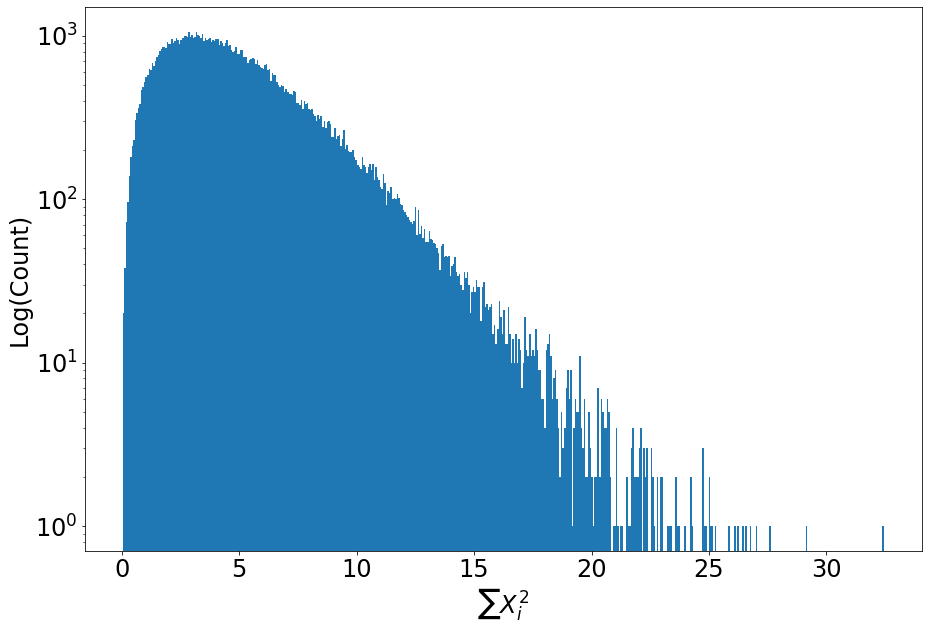

In [12]:
#2 B) Plot the distribution, in x-log(y), semi-log coordinate
ax = plt.hist(d, 500)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel("$\sum X_i^2$", fontsize=24)
plt.ylabel("Log(Count)", fontsize=24)
plt.show()

Two more examples with k = 10 and k = 20:

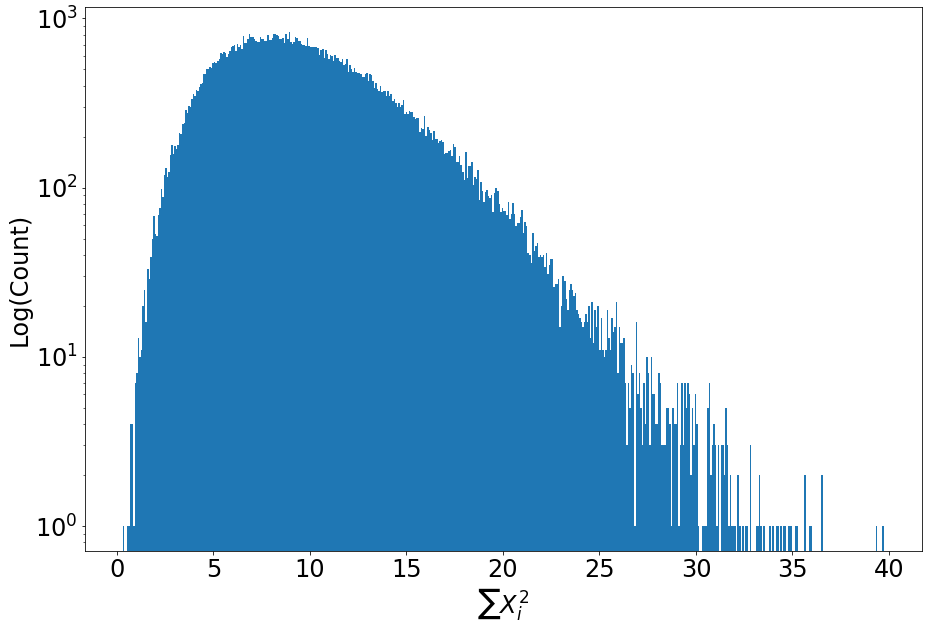

In [14]:
# k = 10
d = stats.chi2.rvs(df = 10., scale = 1, size = 100000)
ax = plt.hist(d, 500)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel("$\sum X_i^2$", fontsize=24)
plt.ylabel("Log(Count)", fontsize=24)
plt.show()

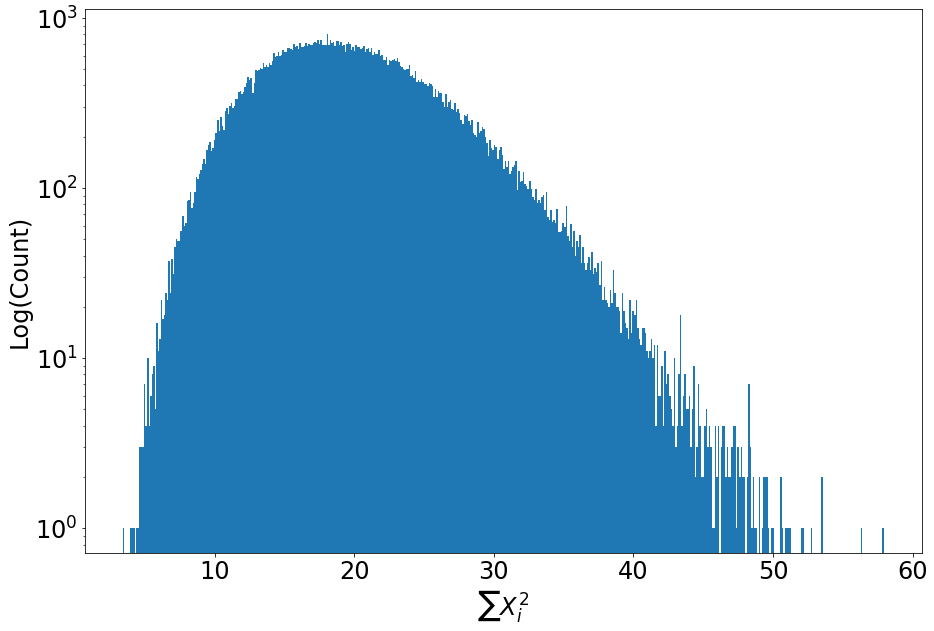

In [15]:
# k = 20
d = stats.chi2.rvs(df = 20., scale = 1, size = 100000)
ax = plt.hist(d, 500)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel("$\sum X_i^2$", fontsize=24)
plt.ylabel("Log(Count)", fontsize=24)
plt.show()

## Example procedure
A) Assuming my signal-free data follows the Chi-Square distribution above, and a hypothetical measurement value is x = 15. If x >= 15, the background would produce a more signal-line data.

<br>B) Our question is, for what value of $X\sigma$ would give the same probability for x >= 15 in chi-square distribution above.
<br>C) The equation to describe this is
$$ \int \limits _{15} ^{\infty} \frac{1}{2^{5/2}\Gamma(5/2)}x^{5/2-1}exp(-x/2)dx = \int \limits _{X\sigma} ^{\infty} \frac{1}{\sigma \sqrt {2\pi}}e^{-(y-\mu)^2/(2 \sigma^2)}dy $$
<br>D)&E) The probability that background produced signal and its equivalent $X\sigma$ is as follow

In [28]:
#3 D) & E)
print("Probaility of getting value bigger than 15 is: ", 1 - stats.chi2.cdf(x = 15, df = 5., scale = 1))
ptail = stats.chi2.cdf(x = 15, df = 5., scale = 1)
print("X is: ", stats.norm.ppf(ptail))

Probaility of getting value bigger than 15 is:  0.010362337915786446
X is:  2.312962957756604


## Other Examples
Same as above, but these, I will try to use the hypothetical measurement value equal to 17 and 19, and code as follow

In [29]:
#4 hypothetical measurement value = 17
print("Probaility of getting value bigger than 17 is: ", 1 - stats.chi2.cdf(x = 17, df = 5., scale = 1))
ptail = stats.chi2.cdf(x = 17, df = 5., scale = 1)
print("X is: ", stats.norm.ppf(ptail))

Probaility of getting value bigger than 17 is:  0.004499796977970538
X is:  2.612069565330639


In [30]:
#4 hypothetical measurement value = 19
print("Probaility of getting value bigger than 19 is: ", 1 - stats.chi2.cdf(x = 19, df = 5., scale = 1))
ptail = stats.chi2.cdf(x = 19, df = 5., scale = 1)
print("X is: ", stats.norm.ppf(ptail))

Probaility of getting value bigger than 19 is:  0.001922136820942999
X is:  2.8906652483625885


From above examples, we can see that as hypothetical value gets bigger, the probability of happening gets lower, and sigma value increases.

# Non-continuous distributions, Poisson
 Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. The parameter is mu, which represent the number of events in a unit time.
<br> 
<br> Below are 3 examples, with mu = 5, 10, and 20.
<br>We can see that the number of cases reached the peak arround x = 5, 10, and 20, and become less frequency for both smaller and bigger x than the typical value mu.

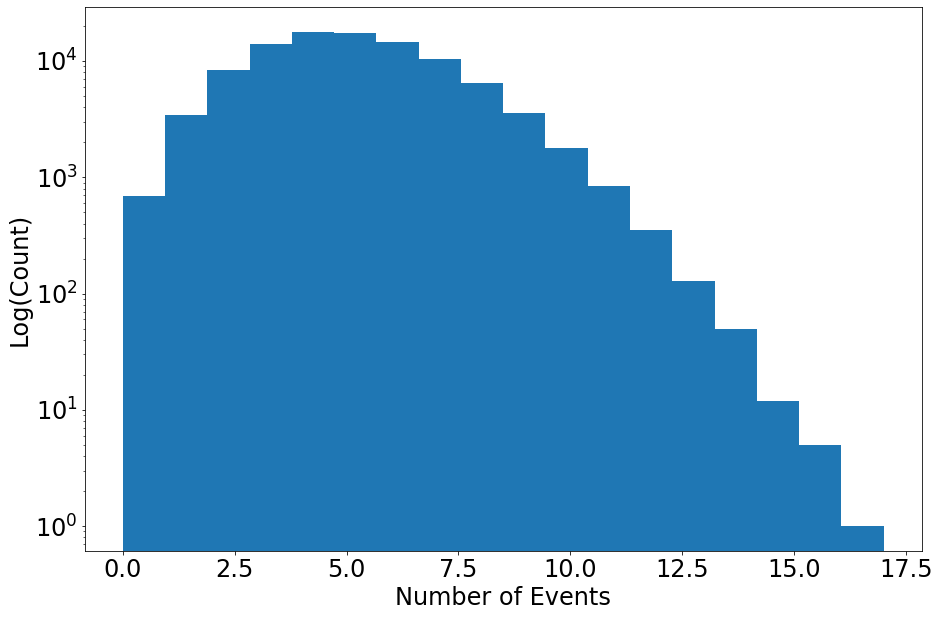

In [26]:
# B)
# mu = 5
d = stats.poisson.rvs(mu = 5, size = 100000)
ax = plt.hist(d, 18)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel("Number of Events", fontsize=24)
plt.ylabel("Log(Count)", fontsize=24)
plt.show()

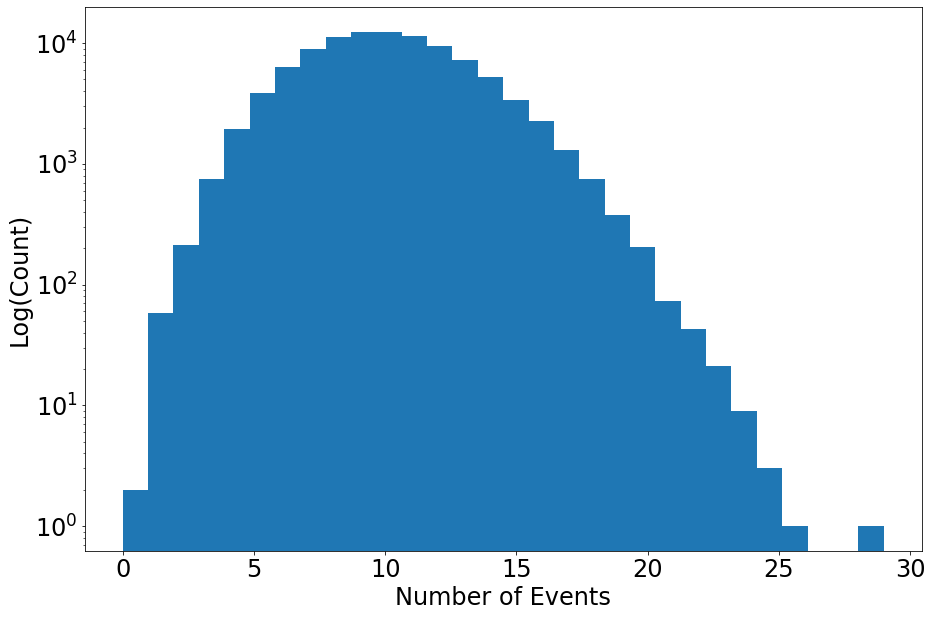

In [19]:
#  mu = 10
d = stats.poisson.rvs(mu = 10, size = 100000)
ax = plt.hist(d, 30)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel("Number of Events", fontsize=24)
plt.ylabel("Log(Count)", fontsize=24)
plt.show()

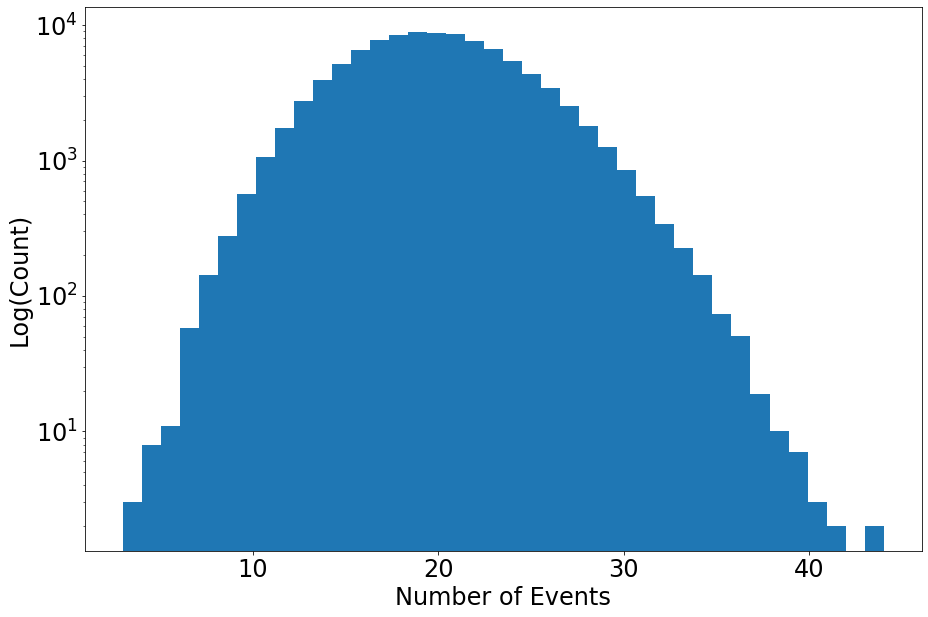

In [20]:
#  mu = 20
d = stats.poisson.rvs(mu = 20, size = 100000)
ax = plt.hist(d, 40)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel("Number of Events", fontsize=24)
plt.ylabel("Log(Count)", fontsize=24)
plt.show()

Let's take the mu = 20 case as the example, assuming my signal-free data follows the poisson distribution above, and the  hypothetical measurement is that is bigger than x = 15 would give a more signal-line data.


In [49]:
# C)
print("Probaility of getting value bigger than 35 is: ", 1 - stats.poisson.cdf(k = 35, mu = 20))
ptail = stats.poisson.cdf(k = 35, mu = 20)
print("X is: ", stats.norm.ppf(ptail))

Probaility of getting value bigger than 35 is:  0.0008036599614044126
X is:  3.154575122416634


D) Since the distributions are discrete, for every integer of $i <= int < i+1$, they will have the same probability and sigma values. For example, 35.5 will have the same values as above:

In [50]:
print("Probaility of getting value bigger than 35.5 is: ", 1 - stats.poisson.cdf(k = 35.5, mu = 20))
ptail = stats.poisson.cdf(k = 35.5, mu = 20)
print("X is: ", stats.norm.ppf(ptail))

Probaility of getting value bigger than 35.5 is:  0.0008036599614044126
X is:  3.154575122416634


E) The mean value have nothing to do with discrete restriction. For example, if the mean of poisson is 5 currenly, then I can add a random case with value 6 into the distribution. This procedure will break the even, and the the mean can no long be exactly 5, while every sample value in the distribution is still discrete.
<br>In conclusion, the possible values will never change, they must be a discrete possitive real integer. However, the mean of the distribution can change continuously.